### 헬멧유무에 따른 오토바이 사고 사망자율

In [130]:
import pandas as pd

In [131]:
file_path = './오토바이 손상환자의 보호장비 착용여부에 따른 입원율 및 사망률 (2018-2020).xlsx'
df = pd.read_excel(file_path)
df

,건수,내원,입원,사망,내원.1,입원.1,사망.1,내원.2,입원.2,사망.2
0,오토바이 헬멧,6108,2171,174,6459,2104,184,5860,1957,199
1,착용,3892,1181,57,4406,1256,72,4270,1284,83
2,미착용,1807,740,76,1743,685,80,1357,539,83
3,미상,409,250,41,310,163,32,233,134,33


In [135]:
df.iloc[:, 4:7]

,내원.1,입원.1,사망.1
0,6459,2104,184
1,4406,1256,72
2,1743,685,80
3,310,163,32


In [134]:
# 2018년
df_2018 = df.iloc[:, :4]
df_2018['사망자율'] = df_2018["사망"]/df_2018["내원"]*100
df_2018

,건수,내원,입원,사망,사망자율
0,오토바이 헬멧,6108,2171,174,2.848723
1,착용,3892,1181,57,1.464543
2,미착용,1807,740,76,4.205866
3,미상,409,250,41,10.024450


In [136]:
# 2019년
df_2019 = df.iloc[:, 4:7]
df_2019.columns = ['내원','입원','사망']
df_2019['사망자율'] = df_2019["사망"]/df_2019["내원"]*100
df_2019

,내원,입원,사망,사망자율
0,6459,2104,184,2.848738
1,4406,1256,72,1.634135
2,1743,685,80,4.589788
3,310,163,32,10.322581


In [137]:
# 2020년
df_2020 = df.iloc[:, 7:]
df_2020.columns = ['내원','입원','사망']
df_2020['사망자율'] = df_2020["사망"]/df_2020["내원"]*100
df_2020

,내원,입원,사망,사망자율
0,5860,1957,199,3.395904
1,4270,1284,83,1.943794
2,1357,539,83,6.116433
3,233,134,33,14.163090


In [138]:
df_all = pd.concat([df_2018,df_2019,df_2020], axis=1)
df_all
df_all.to_csv("./년도별 오토바이헬멧유무데이터.csv")

In [139]:
df_all

,건수,내원,입원,사망,사망자율,내원,입원,사망,사망자율,내원,입원,사망,사망자율
0,오토바이 헬멧,6108,2171,174,2.848723,6459,2104,184,2.848738,5860,1957,199,3.395904
1,착용,3892,1181,57,1.464543,4406,1256,72,1.634135,4270,1284,83,1.943794
2,미착용,1807,740,76,4.205866,1743,685,80,4.589788,1357,539,83,6.116433
3,미상,409,250,41,10.024450,310,163,32,10.322581,233,134,33,14.163090


In [140]:
# 각 년도 사망자율을 한 데이터프레임에 넣기
data = pd.concat([df_2018['사망자율'],df_2019['사망자율'],df_2020['사망자율']], axis=1)

In [141]:
data.columns = ["2018년 사망자율", "2019년 사망자율", "2020년 사망자율"]
data

,2018년 사망자율,2019년 사망자율,2020년 사망자율
0,2.848723,2.848738,3.395904
1,1.464543,1.634135,1.943794
2,4.205866,4.589788,6.116433
3,10.024450,10.322581,14.163090


In [142]:
# 행이름 변경
data.rename(index={0:'오토바이 사고 전체', 1:'헬멧 착용', 2:'헬멧 미착용', 3:'헬멧 착용 미상'}, inplace=True)

In [143]:
data

,2018년 사망자율,2019년 사망자율,2020년 사망자율
오토바이 사고 전체,2.848723,2.848738,3.395904
헬멧 착용,1.464543,1.634135,1.943794
헬멧 미착용,4.205866,4.589788,6.116433
헬멧 착용 미상,10.024450,10.322581,14.163090


In [144]:
data2 = data.T

In [145]:
data3 = data2.drop(['헬멧 착용 미상'], axis=1)

In [147]:
data3.to_csv("./년도별 오토바이헬멧유무,사망자율.csv")

In [187]:
data3

,오토바이 사고 전체,헬멧 착용,헬멧 미착용
2018년 사망자율,2.848723,1.464543,4.205866
2019년 사망자율,2.848738,1.634135,4.589788
2020년 사망자율,3.395904,1.943794,6.116433


In [163]:
A = {"2018년" : 174,
    "2019년" : 184,
    "2020년" : 199}
died = pd.DataFrame(A, index=["사망자수"])
died = died.T
died

,사망자수
2018년,174
2019년,184
2020년,199


In [148]:
import matplotlib.pyplot as plt
import matplotlib

(array([1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

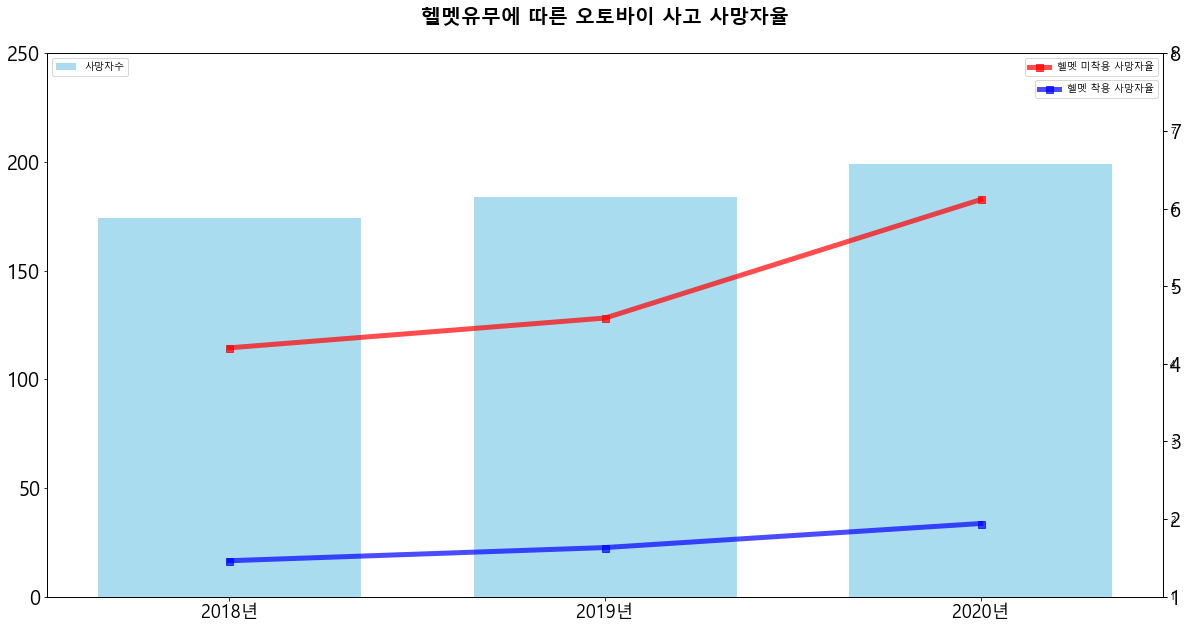

In [223]:
fig, ax1 = plt.subplots()
ax1.bar(died.index, died['사망자수'],color='skyblue', label='사망자수', alpha=0.7, width=0.7)
plt.xticks([i for i in range(0,3,1)], ['2018년','2019년','2020년'], rotation = 0, fontsize='18')
plt.yticks(fontsize = 20)
plt.ylim(0,250)
plt.title('-', fontsize= 30)
plt.legend(loc="upper left")

# title
plt.title("헬멧유무에 따른 오토바이 사고 사망자율", size = 20, weight = 'bold', pad = 30)

ax2 = ax1.twinx()
ax2.plot(data3.index, data3['헬멧 착용'],'-s', color='blue', markersize=7, linewidth=5, alpha=0.7, label='헬멧 착용 사망자율')
plt.ylim(1,8)
#plt.legend(loc="upper right")
ax2.legend(bbox_to_anchor=(1, 0.96))

ax3 = ax1.twinx()
ax3.plot(data3.index, data3['헬멧 미착용'],'-s', color='red', markersize=7, linewidth=5, alpha=0.7, label='헬멧 미착용 사망자율')
plt.ylim(1,8)
plt.legend(loc="upper right")


#ax2.plot(data3.index, data3['헬멧 착용','헬멧 미착용']],'-s', color=['blue','red'], markersize=7, linewidth=5, alpha=0.7)
plt.yticks(fontsize=20)